## Splitwise Analyser

### Importing Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

### Loading Data

In [2]:
expenseData = pd.read_csv("csk_2020-11-15_export.csv")

### Filtering Data For Required Date Range  

In [3]:
dateStart = "2020-11-01"
dateEnd = "2020-11-31"

curMonthData = expenseData[(expenseData["Date"] >= dateStart) &(expenseData["Date"] <= dateEnd) \
                           & (expenseData["Description"]!= "Total balance" )]
curMonthData = curMonthData.reset_index()
curMonthData = curMonthData.drop('index', 1)

In [4]:
defaultColumnNames = ['Date', 'Description', 'Category', 'Cost', 'Currency']
userNames = [each for each in curMonthData.columns if each not in defaultColumnNames]

In [5]:
CostColName = "Cost"
def costRecalculator(row):
    for each in userNames:
        if(row[each] <= 0):
            row[each] = abs(row[each])
        else:
            row[each] = float(row[CostColName]) - row[each]
    return row
curMonthExpenseData = curMonthData.apply(costRecalculator,axis=1)
curMonthExpenseData = pd.melt(curMonthExpenseData, id_vars=defaultColumnNames,var_name='User')
curMonthExpenseData.rename(columns={"value": "Expense"},inplace=True)

In [6]:
#Predefined Function to calculate the ticks and its name for various Axis's
#Based on the min and max values of the array given
def findAxisCordinatesAndNamesForTicks(Values = [],formatValue = 1,divisions = 20,overallMin = -1,overallMax=-1):
    if(overallMin == -1):
        overallMin = Values.agg('min')
    if(overallMax == -1):
        overallMax = Values.agg('max')
    #Finding the y axis label
    axis = []
    axisVariableNames = []
    i = int(overallMin)
    diff = (overallMax - overallMin)/divisions
    if(diff > (int(diff)+ 0.5)):
        diff = int(diff + 1)
    elif(diff > 1):
        diff = int(diff)
    diff = round(diff,2)
    while(i < overallMax + diff):
        i = round(i,2)
        axis.append(i)
        if(formatValue != 1):
            axisVariableNames.append(str(i/formatValue))
        else : 
            axisVariableNames.append(str(i))
        i += diff
    return [axis,axisVariableNames]

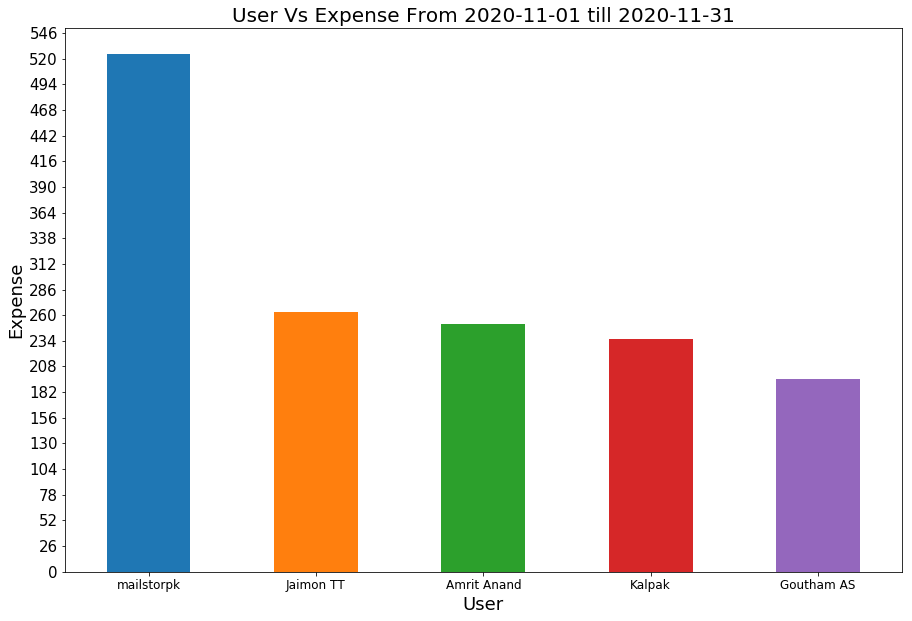

In [7]:
curMonthExpenseDataGrouped = curMonthExpenseData.groupby(['User'])['Expense'].agg('sum').reset_index()
causeGrouped = curMonthExpenseDataGrouped.sort_values(by=['Expense'],ascending =False)

#Finding the y axis label
yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(curMonthExpenseDataGrouped.Expense,overallMin = 0.0)

causeGrouped.plot.bar(x='User',y='Expense',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('Expense',fontsize=18)
plt.xticks(rotation = 0)
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)
plt.xlabel('User',fontsize=18)
plt.title("User Vs Expense From "+dateStart+" till "+dateEnd,fontsize=20)
plt.savefig('overall.png')
plt.show()

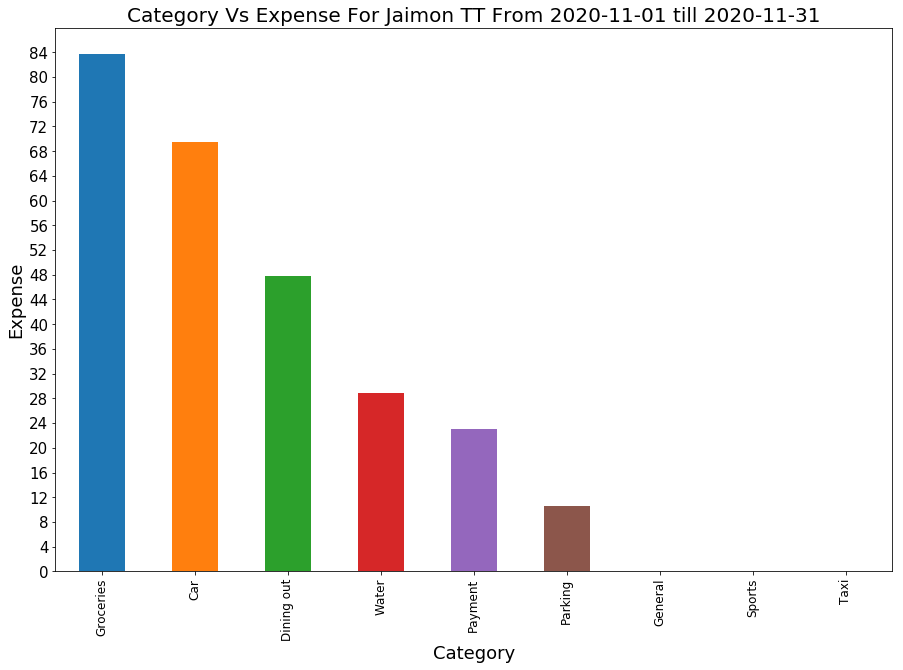

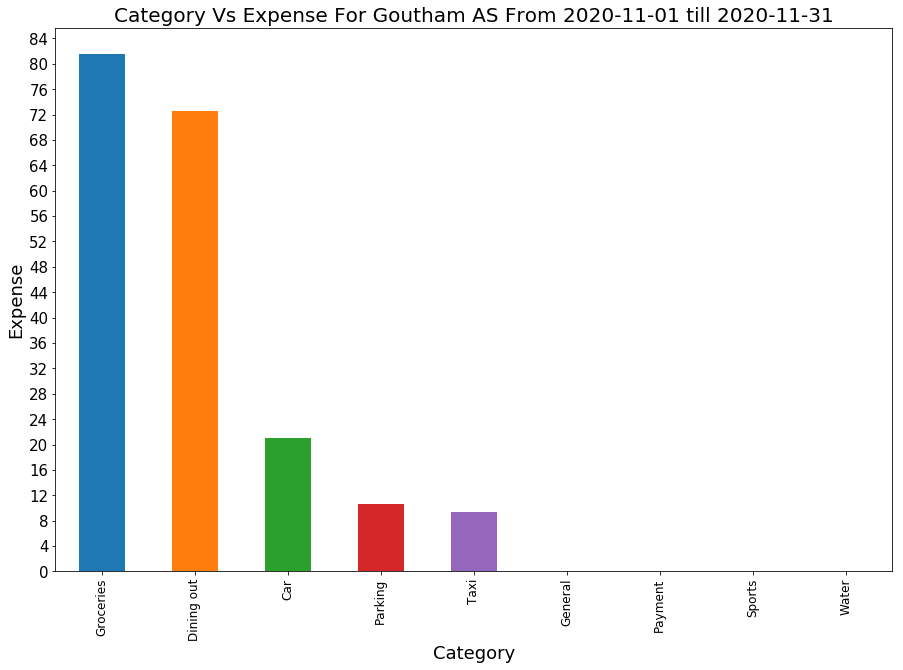

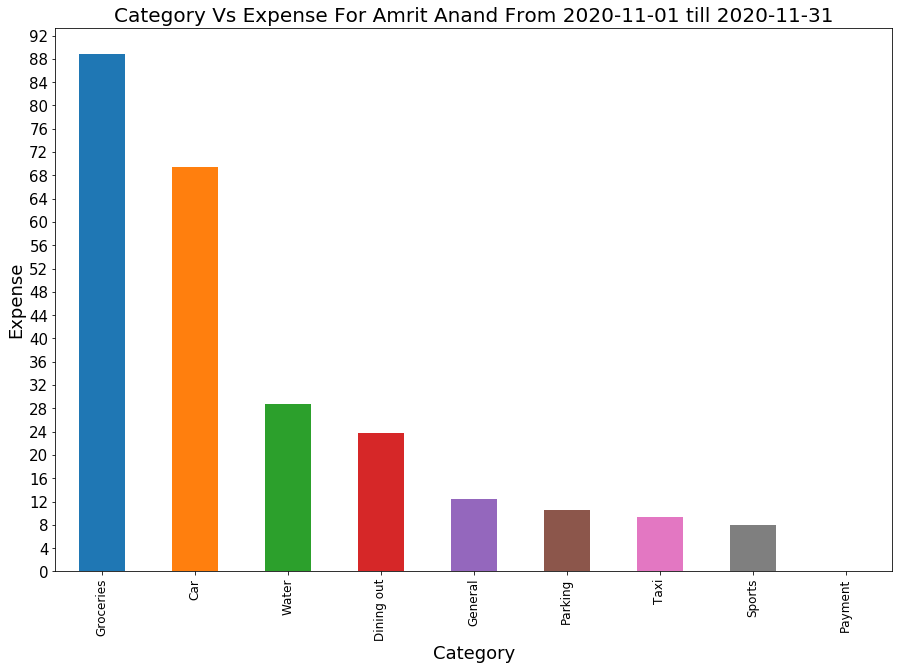

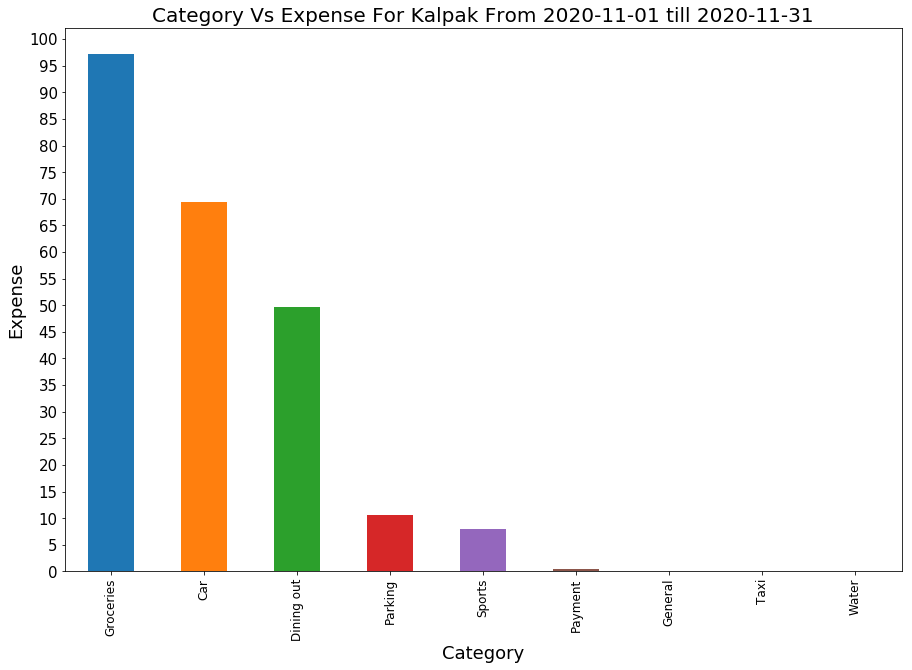

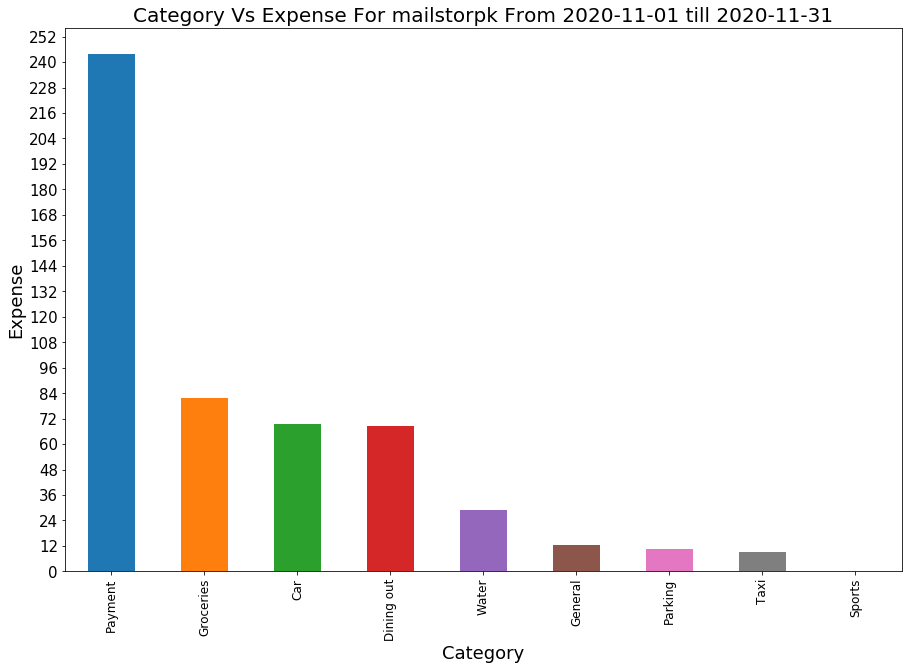

In [8]:
for each in userNames:
    CurrentUserData = curMonthExpenseData[curMonthExpenseData['User'] == each]
    tempData = CurrentUserData.groupby(['Category'])['Expense'].agg('sum').reset_index()
    causeGrouped = tempData.sort_values(by=['Expense'],ascending =False)
    
    #Finding the y axis label
    yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(causeGrouped.Expense,overallMin = 0.0)
    
    causeGrouped.plot.bar(x='Category',y='Expense',figsize=(15, 10),fontsize=12,legend=None)
    plt.ylabel('Expense',fontsize=18)
    plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)
    plt.xlabel('Category',fontsize=18)
    plt.title("Category Vs Expense For "+each+" From "+dateStart+" till "+dateEnd,fontsize=20)
    plt.savefig("Category Wise Report for "+each+".png")
    plt.show()

### Category Grouped Analysis

In [13]:
# Common Used Categories
CategoryGroups = {
    'HouseMaintenance':['Electricity','Household supplies','Maintenance','Water'],
    'Entertainment':['Clothing','Gifts','Sports','Movies'],
    'DiningOut':['Dining out','Liquor'],
    'Groceries':['Groceries'],
    'other':['General'],
    'Transportation':['Heat/gas','Car','Parking','Taxi'],
    'Payment':['Payment']
}

In [14]:
def applyingCategoryGroups(string):
    for key , categoryList in CategoryGroups.items():
        if(string in categoryList):
            return key
    return "Unknown"

In [15]:
curMonthExpenseData['Grouped Category'] = curMonthExpenseData.Category.apply(applyingCategoryGroups)

,Date,Description,Category,Cost,Currency,User,Expense,Grouped Category
0,2020-11-01,Goget fine,Car,88.73,AUD,Jaimon TT,22.19,Transportation
1,2020-11-01,Fish,Groceries,19.60,AUD,Jaimon TT,3.92,Groceries
2,2020-11-01,Uber,Taxi,28.00,AUD,Jaimon TT,0.00,Transportation
3,2020-11-01,Rego,Car,189.00,AUD,Jaimon TT,47.25,Transportation
4,2020-11-01,Rego,Car,21.00,AUD,Jaimon TT,0.00,Transportation
5,2020-11-01,Derby,Dining out,27.00,AUD,Jaimon TT,0.00,DiningOut
6,2020-11-01,Woolworths 31st,Groceries,7.50,AUD,Jaimon TT,1.50,Groceries
7,2020-11-01,Woolworths chicken,Groceries,11.36,AUD,Jaimon TT,2.84,Groceries
8,2020-11-01,Woolworths,Groceries,12.00,AUD,Jaimon TT,2.40,Groceries
9,2020-11-02,Yogurt kubbus,Groceries,6.50,AUD,Jaimon TT,2.17,Groceries


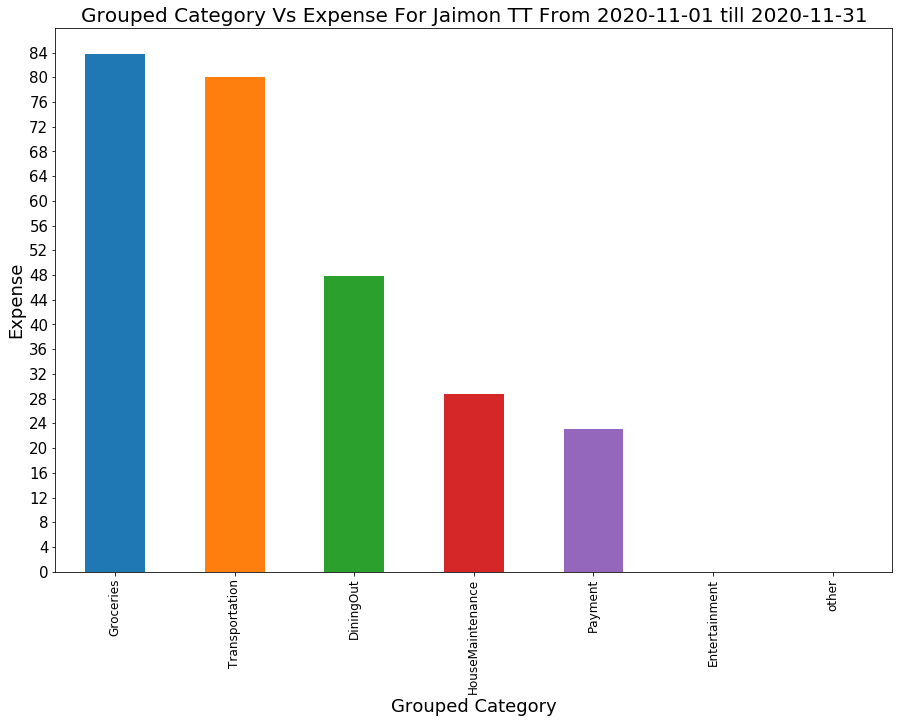

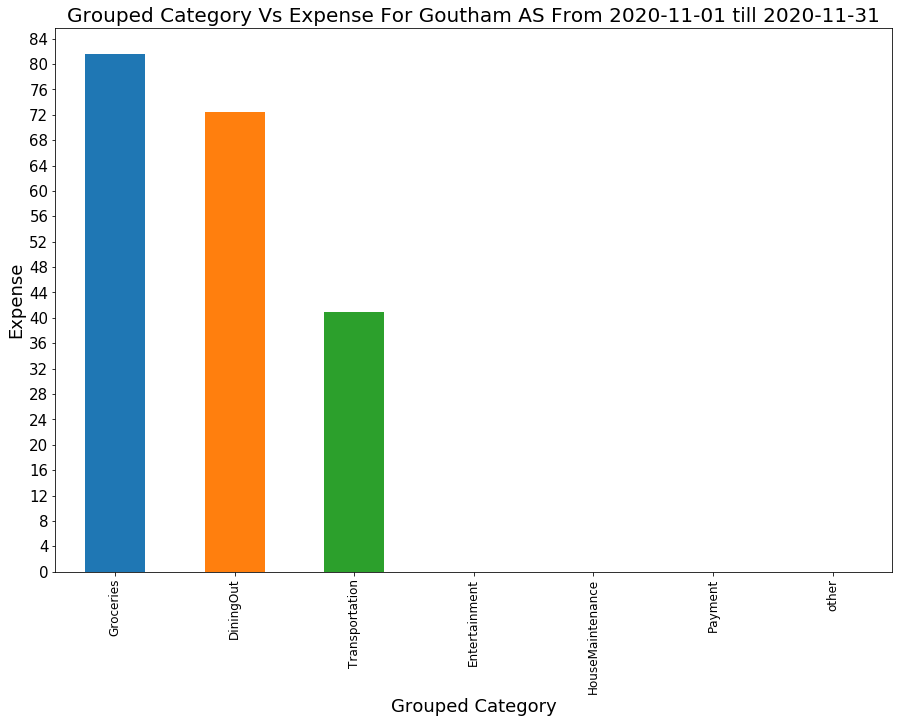

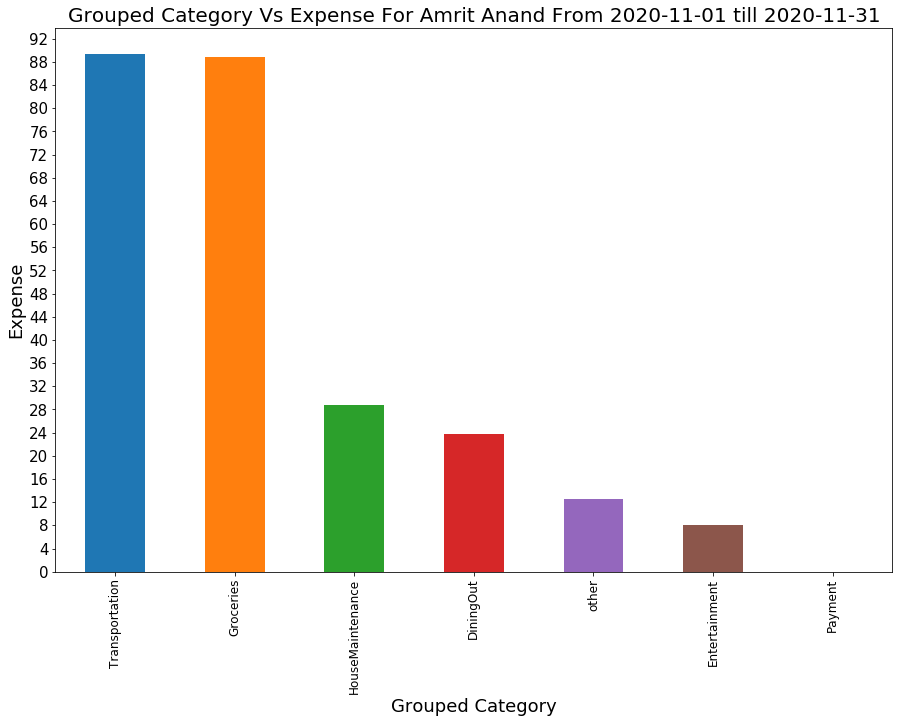

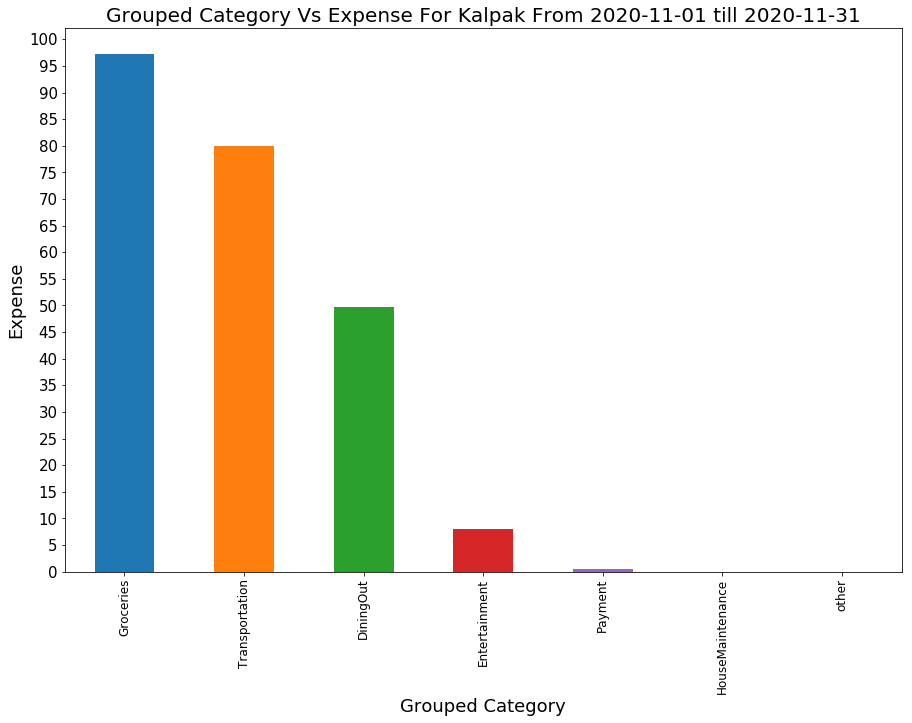

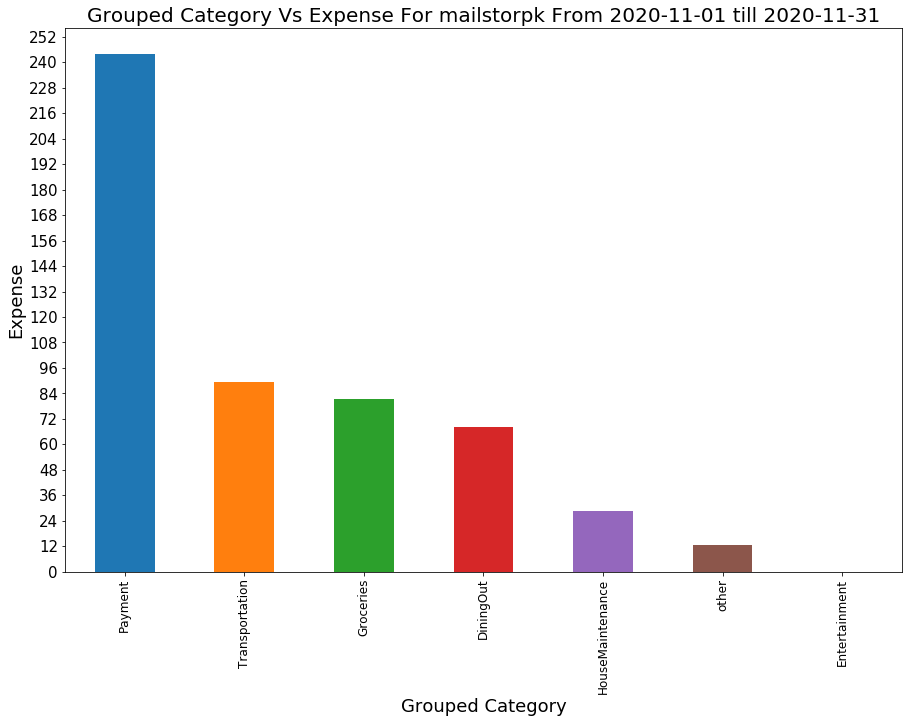

In [19]:
for each in userNames:
    CurrentUserData = curMonthExpenseData[curMonthExpenseData['User'] == each]
    tempData = CurrentUserData.groupby(['Grouped Category'])['Expense'].agg('sum').reset_index()
    causeGrouped = tempData.sort_values(by=['Expense'],ascending =False)
    
    #Finding the y axis label
    yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(causeGrouped.Expense,overallMin = 0.0)
    
    causeGrouped.plot.bar(x='Grouped Category',y='Expense',figsize=(15, 10),fontsize=12,legend=None)
    plt.ylabel('Expense',fontsize=18)
    plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)
    plt.xlabel('Grouped Category',fontsize=18)
    plt.title("Grouped Category Vs Expense For "+each+" From "+dateStart+" till "+dateEnd,fontsize=20)
    plt.savefig("Grouped Category Wise Report for "+each+".png")
    plt.show()